In [2]:
import pandas as pd
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [148]:
df['neighbourhood'].groupby(df['neighbourhood_group']).value_counts().nlargest(20)

neighbourhood_group  neighbourhood     
Brooklyn             Williamsburg          3920
                     Bedford-Stuyvesant    3714
Manhattan            Harlem                2658
Brooklyn             Bushwick              2465
Manhattan            Upper West Side       1971
                     Hell's Kitchen        1958
                     East Village          1853
                     Upper East Side       1798
Brooklyn             Crown Heights         1564
Manhattan            Midtown               1545
                     East Harlem           1117
Brooklyn             Greenpoint            1115
Manhattan            Chelsea               1113
                     Lower East Side        911
Queens               Astoria                900
Manhattan            Washington Heights     899
                     West Village           768
                     Financial District     744
Brooklyn             Flatbush               621
                     Clinton Hill           572


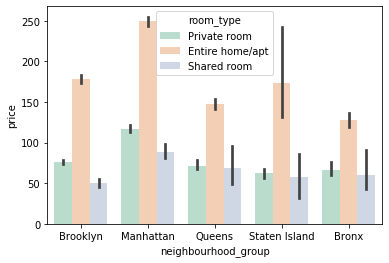

In [15]:
sns.set_palette('Pastel2')
sns.barplot(data = df, x = 'neighbourhood_group', y = 'price', hue = 'room_type')

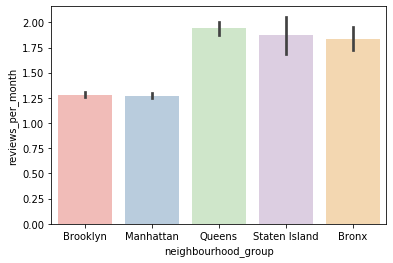

In [13]:
sns.set_palette('Pastel1')
sns.barplot(data=df, x= 'neighbourhood_group', y='reviews_per_month')

(array([ 175., 1545., 2658.,  572., 1117.,  485., 3714., 1958., 1971.,
         368.,  284.,  768., 3920.,  489., 1113., 1564.,  506.,  157.,
         252., 2968.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 20 Patch objects>)

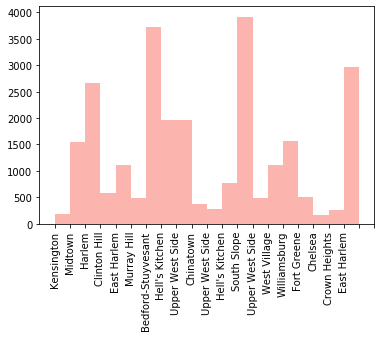

In [46]:
ax=plt.subplot()
xticklabels =list(df['neighbourhood'][0:20])
ax.set_xticklabels (xticklabels, rotation = 90)
plt.hist(df['neighbourhood'],bins=20,range = [0,20])

In [4]:
df['name'].fillna('', inplace=True)

In [55]:
description_words = pd.Series(' '.join(df['name']).split()).value_counts().to_dict()


In [60]:
description_words

{'in': 15806,
 'Private': 4975,
 'Room': 4815,
 'room': 4165,
 'Bedroom': 4125,
 'Cozy': 3820,
 'Apartment': 3636,
 'to': 3560,
 'Brooklyn': 3475,
 '1': 3357,
 '2': 3079,
 'the': 2857,
 'bedroom': 2851,
 'of': 2844,
 'with': 2832,
 '&': 2820,
 'Spacious': 2778,
 'and': 2764,
 'Studio': 2709,
 'East': 2676,
 'Manhattan': 2606,
 'Park': 2353,
 'apartment': 2316,
 '-': 2272,
 'Williamsburg': 2180,
 'Apt': 2090,
 'Sunny': 2048,
 'Beautiful': 1943,
 'Village': 1868,
 'NYC': 1765,
 'private': 1684,
 'Central': 1513,
 'Large': 1500,
 'near': 1495,
 'from': 1468,
 'West': 1358,
 'Modern': 1336,
 'Loft': 1292,
 '1BR': 1289,
 'a': 1279,
 'Luxury': 1251,
 'Upper': 1189,
 'apt': 1189,
 'for': 1154,
 'Charming': 1129,
 'w/': 1119,
 'heart': 1113,
 'Bright': 1104,
 'Side': 1099,
 'New': 1060,
 'Bushwick': 1059,
 '+': 1030,
 'Home': 1005,
 '|': 963,
 '3': 963,
 'on': 957,
 'Midtown': 936,
 'BR': 933,
 'Harlem': 927,
 'studio': 889,
 'The': 871,
 'Brownstone': 870,
 'by': 865,
 'Heart': 842,
 'Great':

In [5]:
import re

def clean_text (i): 
    clean_text= re.sub(r'[^\w]', ' ', i)
    return clean_text 

def lower (i): 
    lower = i.lower()
    return lower 
    
df['name_toks'] = df['name'].apply(clean_text) 
df['name_toks'] = df['name_toks'].apply(lower)


In [6]:
from nltk.tokenize import word_tokenize

df['name_toks'] = df.apply(lambda row: word_tokenize(row['name_toks']), axis=1)

In [130]:
name_word_list = df['name_toks'].tolist()

In [138]:
df['name_toks'].value_counts().nlargest(20)

[home, away, from, home]                              38
[private, room]                                       26
[hillside, hotel]                                     18
[]                                                    18
[private, room, in, brooklyn]                         16
[new, york, multi, unit, building]                    16
[private, room, in, williamsburg]                     16
[brooklyn, apartment]                                 13
[cozy, room]                                          11
[loft, suite, the, box, house, hotel]                 11
[home, sweet, home]                                   11
[your, home, away, from, home]                        11
[cozy, private, room]                                 10
[room, with, a, view]                                 10
[artsy, private, br, in, fort, greene, cumberland]    10
[cozy, room, in, brooklyn]                             9
[cozy, brooklyn, apartment]                            9
[beautiful, brooklyn, brownston

In [150]:
df['name'].groupby(df['neighbourhood_group']).value_counts().nlargest(20)

neighbourhood_group  name                                              
Queens               Hillside Hotel                                        18
Brooklyn             Brooklyn Apartment                                    12
                     Loft Suite @ The Box House Hotel                      11
                     Artsy Private BR in Fort Greene Cumberland            10
Manhattan                                                                   9
Brooklyn             Beautiful Brooklyn Brownstone                          8
                     Cozy Brooklyn Apartment                                8
                     Private room in Brooklyn                               8
                     Private room in Williamsburg                           8
Queens               Home away from home                                    8
Manhattan            Harlem Gem                                             7
Brooklyn                                                              

In [153]:
df['reviews_per_month'].min()
df['reviews_per_month'].max()

58.5

(array([15775.,  5420.,  4062.,  2441.,  2388.,  1872.,  1680.,  1229.,
         1059.,   758.,   565.,   447.,   282.,   216.,   144.,   116.,
           92.,    72.,    42.,    38.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

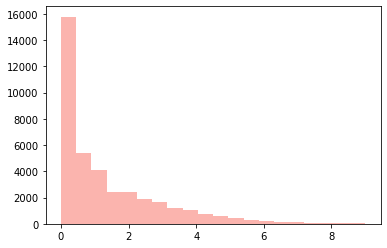

In [158]:
plt.hist(df['reviews_per_month'], bins = 20, range=(0,9))

(array([8698., 6418., 6032., 4358., 4480., 2510., 3104., 1289., 1783.,
         388.,  716.,  888.,  283.,  525.,  218.,  430.,  114.,  199.,
          63.,  328.]),
 array([ 50. ,  72.5,  95. , 117.5, 140. , 162.5, 185. , 207.5, 230. ,
        252.5, 275. , 297.5, 320. , 342.5, 365. , 387.5, 410. , 432.5,
        455. , 477.5, 500. ]),
 <a list of 20 Patch objects>)

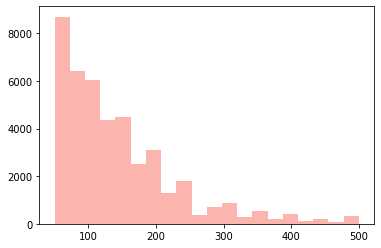

In [160]:
plt.hist(df['price'], bins = 20, range = (50, 500))

I want to plot the reviews per month against price to see if they have correlation. However the data spreads quite a lot at the extremes so first let's use histograms to determine the useful range 

(50, 1000)

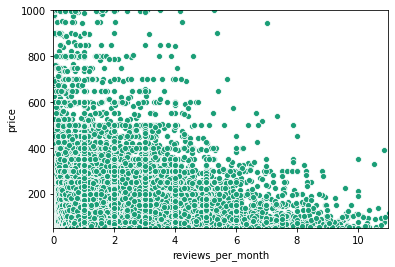

In [168]:
sns.set_palette('Dark2')
sns.scatterplot(data=df, x='reviews_per_month', y='price')
plt.xlim(0,11)
plt.ylim(50,1000)

I guess this simply shows a concentration of data towards the lower end of the spectrum for both reviews and price. Sadly no correlation that says reviews per month have a positive impact on price 

There isnt really data to show which hosts are the busiest, but let's assume it is those with the most reviews since airbnb quite actively encourages reviews 

(0, 3)

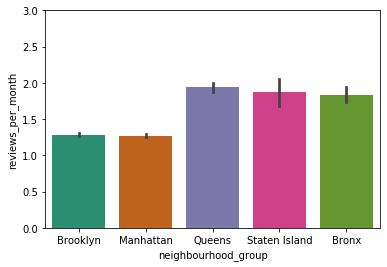

In [174]:
sns.barplot(data=df, x = "neighbourhood_group", y = 'reviews_per_month')
plt.ylim(0,3)

In [184]:
df.sort_values(by='reviews_per_month', ascending=False, na_position='last', inplace=True)

In [186]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,name_toks
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299,"[enjoy, great, views, of, the, city, in, our, ..."
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299,"[great, room, in, the, heart, of, times, square]"
38870,30423106,Lou's Palace-So much for so little,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,2019-07-08,20.94,1,134,"[lou, s, palace, so, much, for, so, little]"
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,2019-07-06,19.75,3,26,"[jfk, comfort, 5, mins, from, jfk, private, be..."
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,2019-07-08,17.82,3,25,"[jfk, 2, comfort, 5, mins, from, jfk, private,..."
29628,22750161,JFK 3 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66298,-73.77000,Private room,50,1,302,2019-07-06,16.81,3,26,"[jfk, 3, comfort, 5, mins, from, jfk, private,..."
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341,"[cozy, room, family, home, lga, airport, no, c..."
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337,"[cute, tiny, room, family, home, by, lga, no, ..."
36238,28826608,“For Heaven Cakes”,217379941,Brent,Queens,Springfield Gardens,40.66457,-73.76918,Entire home/apt,75,1,132,2019-07-05,15.78,1,28,"[for, heaven, cakes]"
40297,31249784,Studio Apartment 6 minutes from JFK Airport,232251881,Lakshmee,Queens,Jamaica,40.66793,-73.78452,Private room,67,1,95,2019-07-05,15.32,8,145,"[studio, apartment, 6, minutes, from, jfk, air..."


In [23]:
word_list=df['name_toks'].head(20)

In [10]:
def flatten_nested_list(nested_list):
    flat_list = []
    # Iterate over all the elements in given list
    for elem in nested_list:
        # Check if type of element is list
        if isinstance(elem, list):
            # Extend the flat list by adding contents of this element (list)
            flat_list.extend(flatten_nested_list(elem))
        else:
            # Append the elemengt to the list
            flat_list.append(elem)    
    return flat_list

In [29]:

words=[]
for i in range(len(word_list)): 
    words.append(word_list[i])
    

In [32]:
words1=flatten_nested_list(words)

In [33]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 

text_no_stops = [word for word in words1 if word not in stop_words]

In [37]:
len(text_no_stops)

97

In [70]:
import collections
def sort_list(lst): 
    counts = collections.Counter(lst)
    new_list = sorted(lst, key=lambda x: (counts[x], x), reverse=True)
    return new_list

In [73]:
text_no_stops = sort_list(text_no_stops)

In [75]:
word_counts = collections.Counter (text_no_stops)
word_counts.most_common(10)

[('cozy', 4),
 ('room', 3),
 ('park', 3),
 ('manhattan', 3),
 ('east', 3),
 ('apt', 3),
 ('1', 3),
 ('west', 2),
 ('village', 2),
 ('upper', 2)]

(Actually then there's no need to use the sort list fucntion)

In [82]:
words_df = pd.DataFrame(word_counts.most_common(50), columns=['words', 'count'])

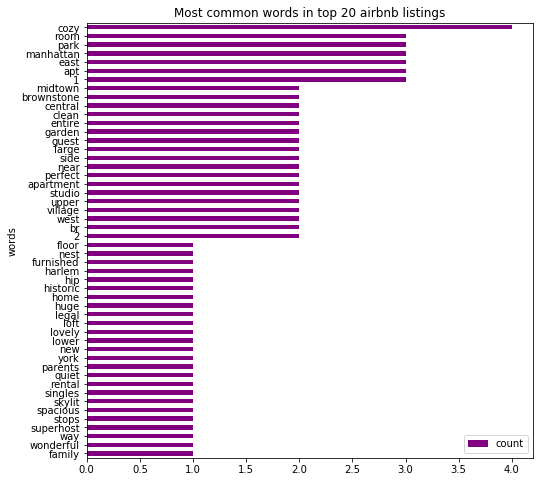

In [92]:
fig, ax = plt.subplots(figsize = (8,8))
words_df.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color = 'purple')
ax.set_title("Most common words in top 20 airbnb listings")
plt.show()


In [84]:
all_words = df['name_toks']


In [86]:
all_words_flat = flatten_nested_list(all_words)

In [88]:
all_words_no_stop = [word for word in all_words_flat if word not in stop_words]

In [89]:
all_words_counted_object = collections.Counter (all_words_no_stop)
all_words_counted_object.most_common(10)

[('room', 10281),
 ('bedroom', 8205),
 ('private', 7409),
 ('apartment', 6760),
 ('cozy', 5097),
 ('apt', 4740),
 ('1', 4230),
 ('brooklyn', 4175),
 ('studio', 4106),
 ('2', 3834)]

In [90]:
all_words_df = pd.DataFrame(all_words_counted_object.most_common(50), columns=['words', 'count'])

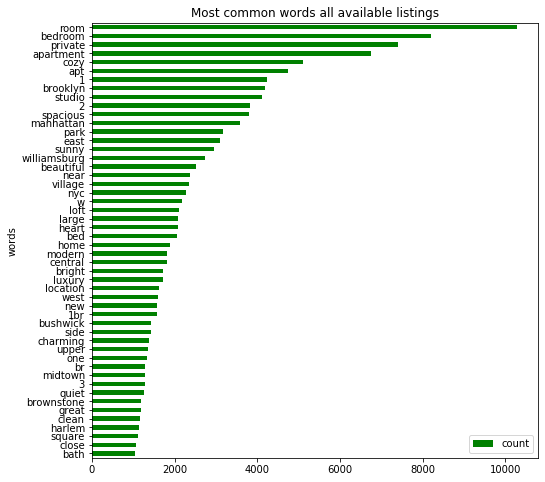

In [91]:
fig, ax = plt.subplots(figsize = (8,8))
all_words_df.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color = 'green')
ax.set_title("Most common words all available listings")
plt.show()

Cozy apparently a super important word that prompts high engagement 
Private mentioned a lot but not in the top 20 listings analysis -- probably a hygiene factor 
Midtown / Manhattan possibly prompts higher engagement although Brooklyn is mentioned more frequently overall 
If we look at the cluster of words near the top of both graphs we can get a picture of what prompts higher engagement (more reviews) - large, entire apartments / studios, possibly with a garden vs. what is most commonly listed - sunny, spacious rooms 
Words like 'nest' and 'skylit' have high impact (appears in first graph but not the second) possibly because they are richly descriptive 
'Superhost' also high impact possibly because it's reassuring of quality 

In [98]:
from osgeo import gdal, ogr, osr
from fiona.ogrext import Iterator, ItemsIterator, KeysIterator
from geopandas import GeoDataFrame
gdal.VersionInfo()

ModuleNotFoundError: No module named 'osgeo'